In [2]:
%matplotlib inline
import numpy as np
import torch
from torch.utils.serialization import load_lua
import os
import scipy.io as sio
import cv2
import math
from matplotlib import pyplot as plt

In [3]:
TRAIN_DATA_DIR = '/Data/nruiz9/data/facial_landmarks/300W_LP/'
AFW = os.path.join(TRAIN_DATA_DIR, 'AFW')

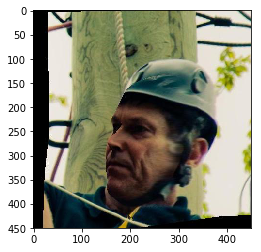

 ['roi', 'Shape_Para', 'Pose_Para', 'Exp_Para', '__header__', '__globals__', 'Color_Para', 'Illum_Para', 'pt2d', '__version__', 'Tex_Para']
pitch, yaw, roll:  16.8574 45.7653 17.3256


In [11]:
img_name = 'AFW_4584451140_2_'
img_path = os.path.join(AFW, img_name + '.jpg')
mat_path = os.path.join(AFW, img_name + '.mat')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mat = sio.loadmat(mat_path)

plt.imshow(img)
plt.show()
print mat.keys()
pitch, yaw, roll = mat['Pose_Para'][0][0:3] * 180 / np.pi
print 'pitch, yaw, roll: ', pitch, yaw, roll

[-0.87804114818573, -0.22214050590991974, -0.1486462503671646, 216.78628540039062, 242.63656616210938, -66.12765502929688, 0.0013571734307333827]
-0.878041 0.222141 -0.148646
((286.48701538719649, 128.29936640991286), (163.45533962552264, 258.61294564663456), (174.83399077116931, 280.22379053300978), 141.78628540039062, 167.63656616210938)


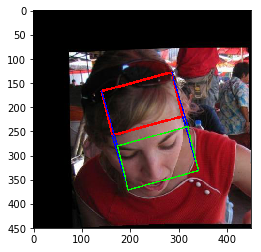

In [17]:
# For pose we have [pitch yaw roll tdx tdy tdz scale_factor]
from math import cos, sin

img_name = 'AFW_91328372_1_1'
img_path = os.path.join(AFW, img_name + '.jpg')
mat_path = os.path.join(AFW, img_name + '.mat')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mat = sio.loadmat(mat_path)

frame = img
pose_params = mat['Pose_Para'][0]

print pose_params.tolist()
pitch, yaw, roll, tdx, tdy, tdz, scale = pose_params

size = 150

p = pitch
y = -yaw
r = roll

if y < 0:
    face_x = tdx - 0.50 * size
    face_y = tdy - 0.50 * size
else:
    face_x = tdx - 0.50 * size
    face_y = tdy - 0.50 * size
    

print p, y ,r

x1 = size * (cos(y) * cos(r)) + face_x
y1 = size * (cos(p) * sin(r) + cos(r) * sin(p) * sin(y)) + face_y

x2 = size * (-cos(y) * sin(r)) + face_x
y2 = size * (cos(p) * cos(r) - sin(p) * sin(y) * sin(r)) + face_y

x3 = size * (sin(y)) + face_x
y3 = size * (-cos(y) * sin(p)) + face_y

print((x1, y1), (x2, y2), (x3, y3), face_x, face_y)
# Draw base in red
cv2.line(frame, (int(face_x), int(face_y)), (int(x1),int(y1)),(255,0,0),3)
cv2.line(frame, (int(face_x), int(face_y)), (int(x2),int(y2)),(255,0,0),3)
cv2.line(frame, (int(x2), int(y2)), (int(x2+x1-face_x),int(y2+y1-face_y)),(255,0,0),3)
cv2.line(frame, (int(x1), int(y1)), (int(x1+x2-face_x),int(y1+y2-face_y)),(255,0,0),3)
# Draw pillars in blue
cv2.line(frame, (int(face_x), int(face_y)), (int(x3),int(y3)),(0,0,255),2)
cv2.line(frame, (int(x1), int(y1)), (int(x1+x3-face_x),int(y1+y3-face_y)),(0,0,255),2)
cv2.line(frame, (int(x2), int(y2)), (int(x2+x3-face_x),int(y2+y3-face_y)),(0,0,255),2)
cv2.line(frame, (int(x2+x1-face_x),int(y2+y1-face_y)), (int(x3+x1+x2-2*face_x),int(y3+y2+y1-2*face_y)),(0,0,255),2)
# Draw top in green
cv2.line(frame, (int(x3+x1-face_x),int(y3+y1-face_y)), (int(x3+x1+x2-2*face_x),int(y3+y2+y1-2*face_y)),(0,255,0),2)
cv2.line(frame, (int(x2+x3-face_x),int(y2+y3-face_y)), (int(x3+x1+x2-2*face_x),int(y3+y2+y1-2*face_y)),(0,255,0),2)
cv2.line(frame, (int(x3), int(y3)), (int(x3+x1-face_x),int(y3+y1-face_y)),(0,255,0),2)
cv2.line(frame, (int(x3), int(y3)), (int(x3+x2-face_x),int(y3+y2-face_y)),(0,255,0),2)

plt.imshow(frame)
plt.show()